In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
url="https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv"

df=pd.read_csv(url)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.set_index("PassengerId",inplace=True)

In [4]:
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
df.tail(30)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


This dataset contains the details of passenger in Titanic ship in which both numerical and categorical data is present.Here Survived is the target variable which contains 2 categories so it will be termed as 'classifcation problem' so to predict the survived passenger using the classification models.

# Exploratory Data Analysis (EDA)

In [6]:
#checking the dimension of the dataset

df.shape

(891, 11)

Dataset contains 891 rows and 11 columns

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#checking the columns of dataset
df.columns.tolist()

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
print("The dimension of the dataset",df.shape)
print("\nThe columns headers in the dataset :",df.columns)

The dimension of the dataset (891, 11)

The columns headers in the dataset : Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
#checking the datatypes of columns
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      

The dataset contains 5 string columns and 6 numerical columns

# Checking for NAN,np.nan,None,null value

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
df.isnull().sum().sum()

866

<Axes: ylabel='PassengerId'>

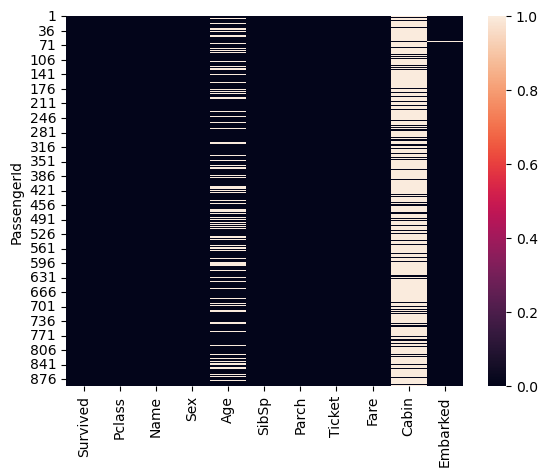

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
#checking the value.counts of each columns

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      

Find that there are null value in the data and there are 5 object columns , 2 float and 4 integer column and memory usage is 83.2 kb

From here we can find that Survived is label which is contains datatype in int64 but only two class in it 0 as not survived and 1 as survived so it will be termed as Classification problem so to predict the survial rate  using the classification model

Also require to convert Ticket, Cabin,Sex and Embarked from object to numerical data type using label encoder before doing any EDA ,preprocessing

In [17]:
#Checking the mean of Age coloumn
print("The mean value of TotalCharges is :",df["Age"].mean())

The mean value of TotalCharges is : 29.69911764705882


In [18]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Feature Preprocessing 

In [20]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")


df["Cabin"]=imp.fit_transform(df["Cabin"].values.reshape(-1,1))
df["Embarked"]=imp.fit_transform(df["Embarked"].values.reshape(-1,1))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [22]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: S

<Axes: ylabel='PassengerId'>

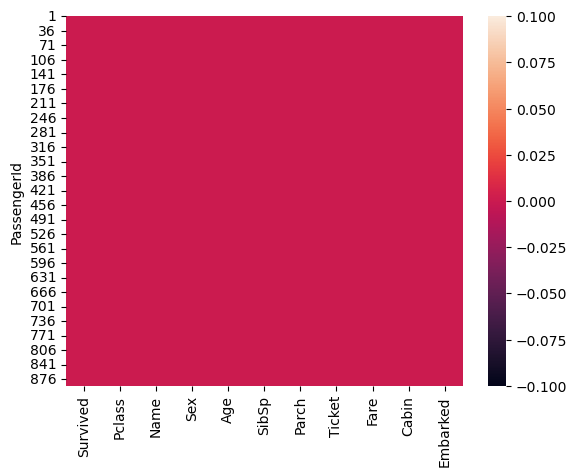

In [23]:
sns.heatmap(df.isnull())

In [24]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Filling Na with mean in Age and most_frequent with cabin and embarked 

In [25]:
#Separating numerical and categorical column

categorical_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns :",categorical_col)
print("\n")        
        
num_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns :",num_col)
print("\n")

Categorical Columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Numerical Columns : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']




In [26]:
categorical_col.remove("Name")

In [27]:
df.nunique().to_frame("No. of unique value")

,No. of unique value
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


In [28]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

col_to_encode=["Sex","Ticket","Cabin","Embarked"]


for col in col_to_encode:
    df[col] =LE.fit_transform(df[col])
    
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,523,7.2500,47,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,596,71.2833,81,0
3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,669,7.9250,47,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,49,53.1000,55,2
5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,101,13.0000,47,2
888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,14,30.0000,30,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,675,23.4500,47,2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int32  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    int32  
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int32  
 10  Embarked  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4), object(1)
memory usage: 69.6+ KB


As Name has not impact or direct relation for survived paasenger here we can drop this column as label encoder is also for no use in this column

In [30]:
df.drop(["Name"],axis=1,inplace=True)

In [31]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket        int32
Fare        float64
Cabin         int32
Embarked      int32
dtype: object

In [32]:
columns_to_convert = ['Age', 'Fare']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
    

In [33]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


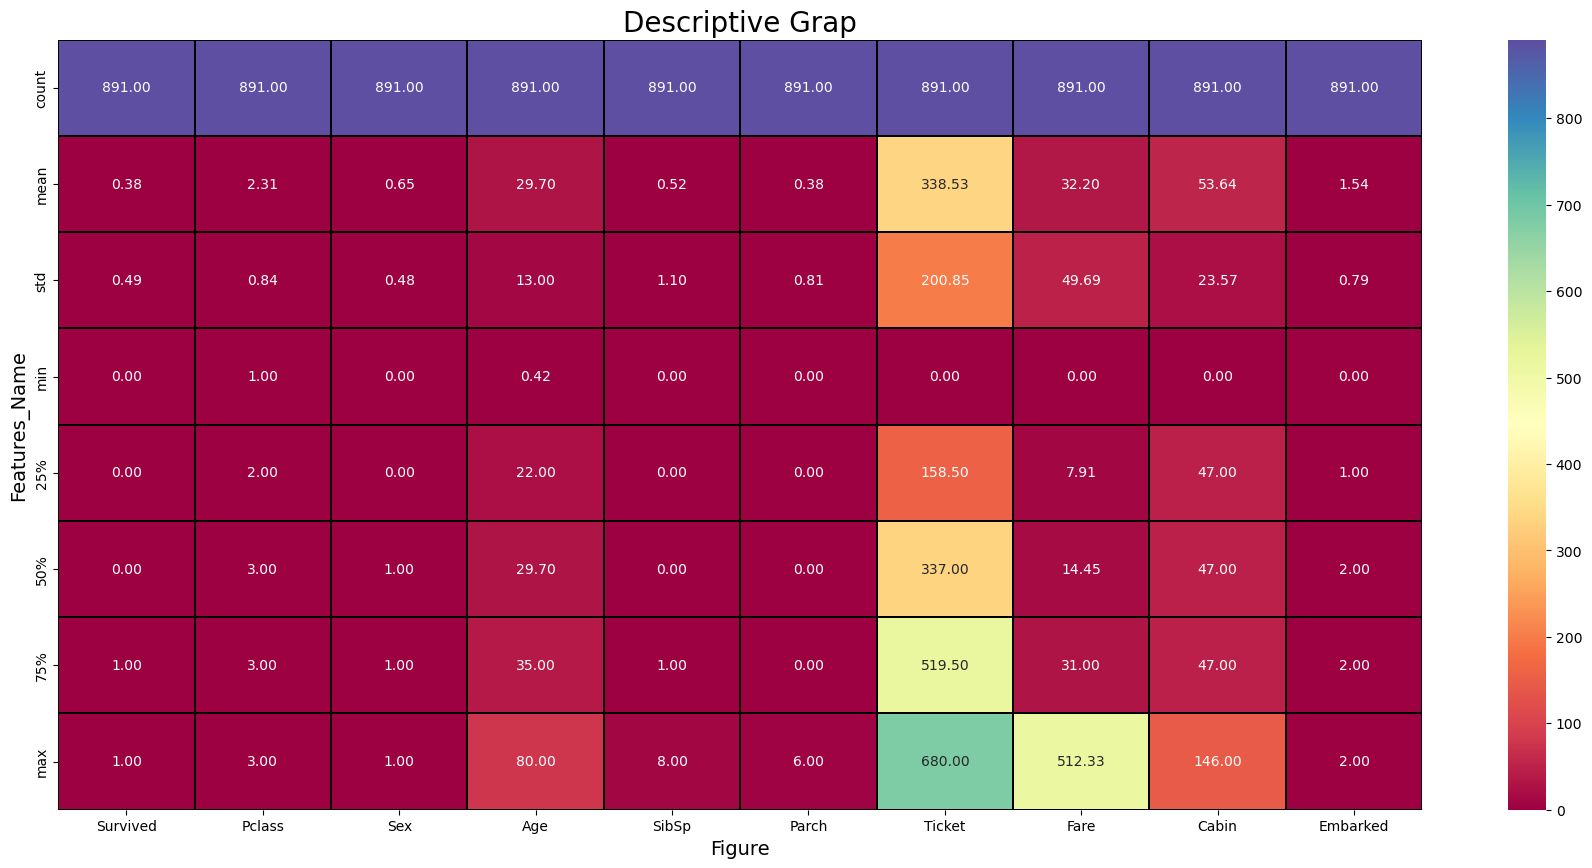

In [34]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot= True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.ylabel("Features_Name",fontsize=14)
plt.title("Descriptive Grap",fontsize=20)
plt.show()

The uniform distribution of the features variable are seen in the dataset except for fare,cabin columns mean>median in the description this indicates positive or right skewdnwess with outliers  

# Univariate analysis 

0    549
1    342
Name: Survived, dtype: int64


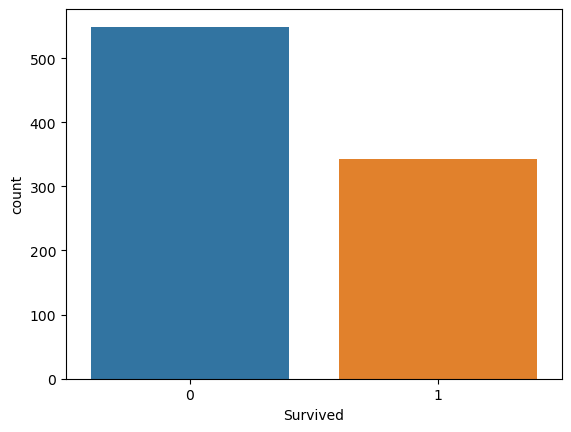

In [35]:
sns.countplot(x="Survived",data=df)
print(df["Survived"].value_counts())

The 0 indicate non survival and 1 indicate survived and also observe that there is count difference and high biasedness in the target variable towards 0 

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
1    577
0    314
Name: Sex, dtype: int64
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
333    7
568    7
80     7
249    6
566    6
      ..
513    1
98     1
212    1
606    1
466    1
Name: Ticket, Length: 681, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
47     691
145      4
63       4
62       3
142      3
      ... 
124      1
76       1
72       1
125      1
60       1
Name

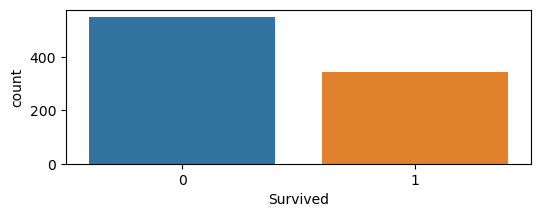

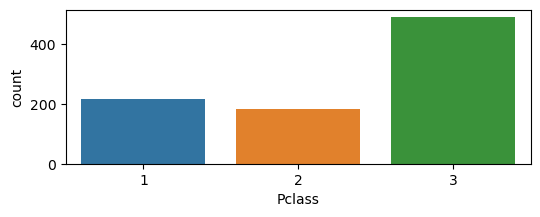

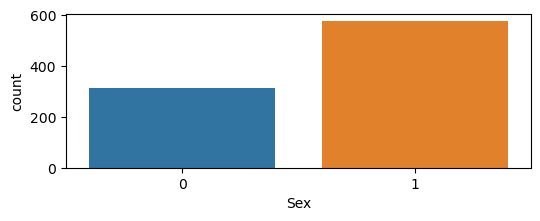

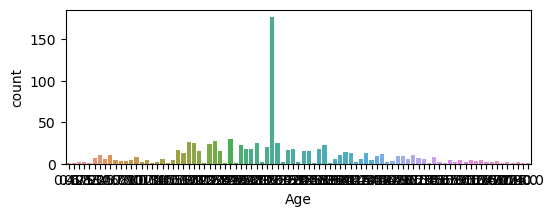

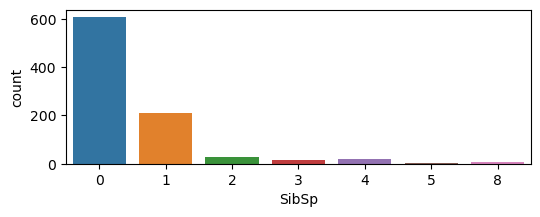

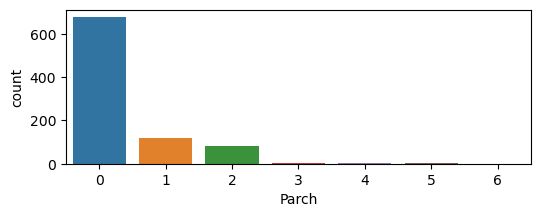

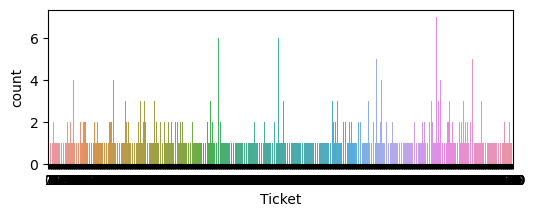

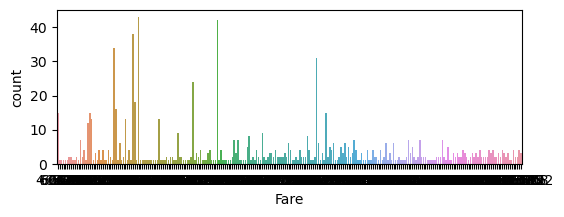

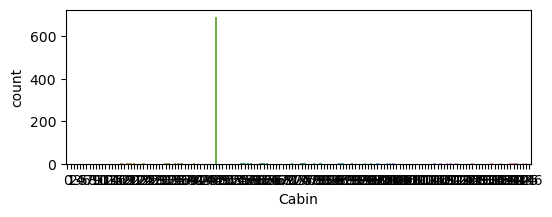

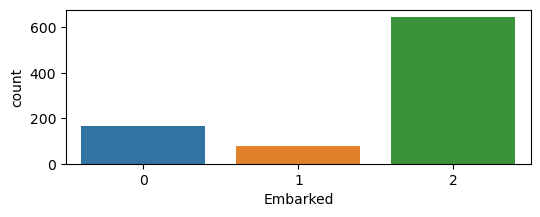

In [36]:
for i in df.columns:
    plt.figure(figsize=(6,2),facecolor="white")
    sns.countplot(x=df[i],data=df)
    print(df[i].value_counts())
plt.show()

As we can see value counts for each columns show non- uniform in nature as data shows high baisedness and low variance which leads to poor training of the model from the dataset

# Checking the distribution of the data by using distplot

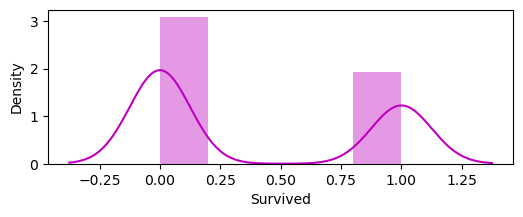

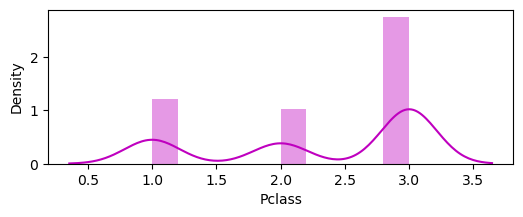

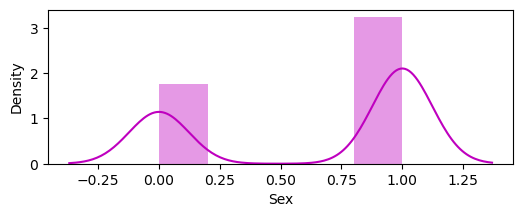

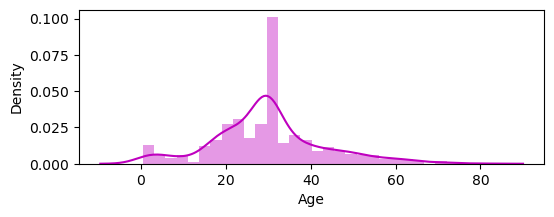

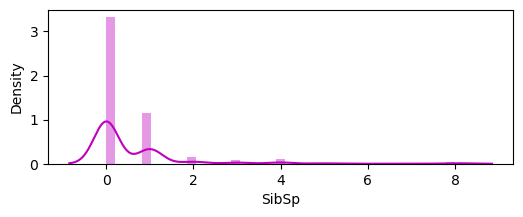

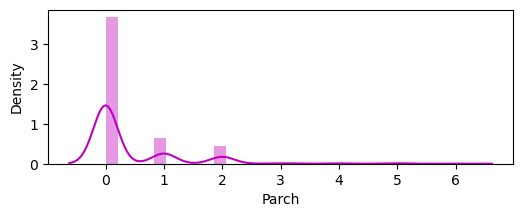

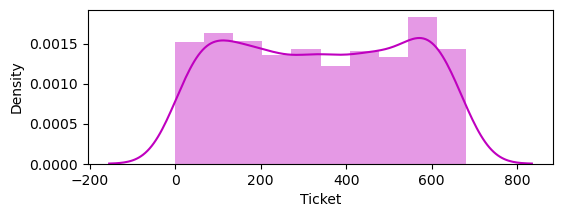

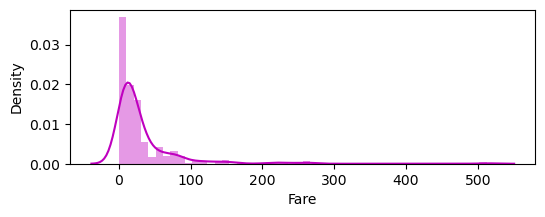

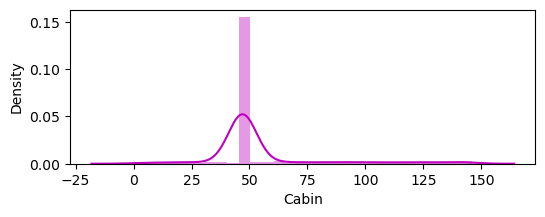

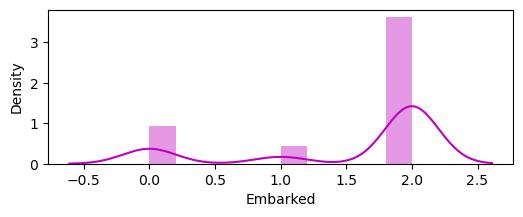

In [37]:
#Checking the distribution of the data of numerical column  by using distplot

for i in df.columns:
    plt.figure(figsize=(6,2),facecolor="white")
    sns.distplot(df[i],color="m")
plt.show()

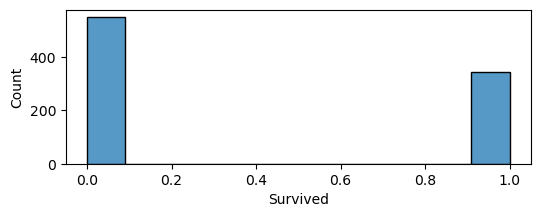

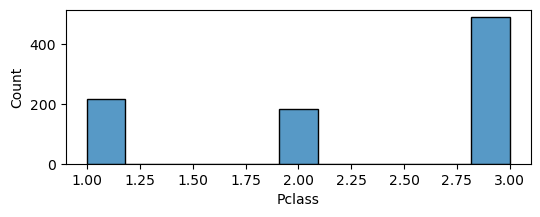

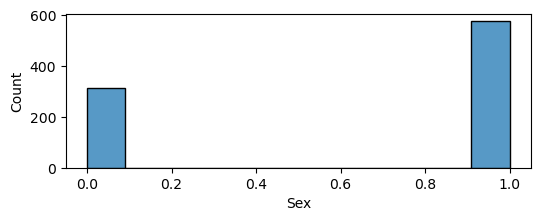

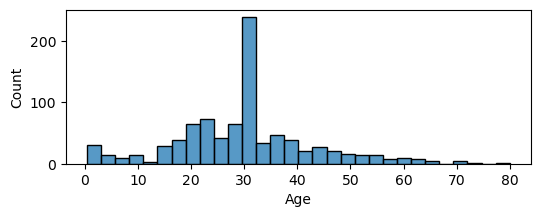

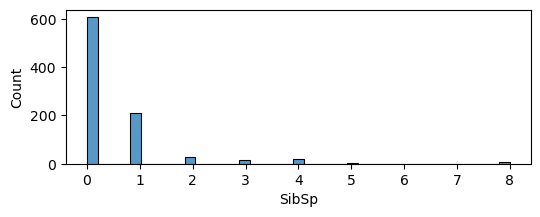

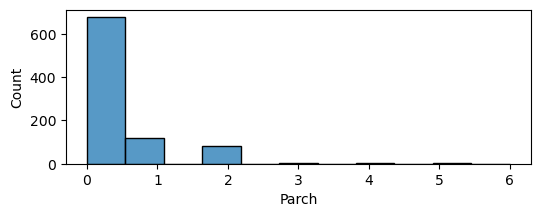

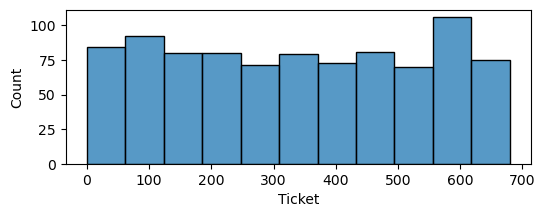

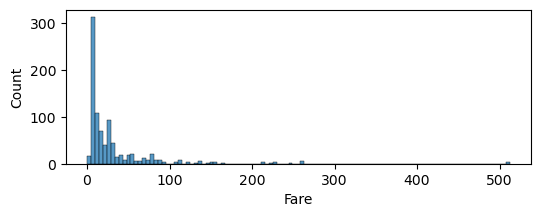

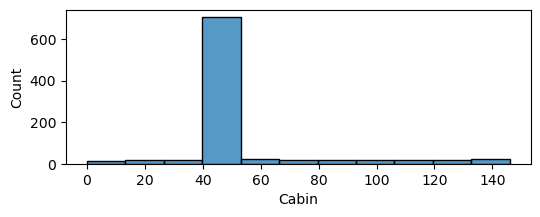

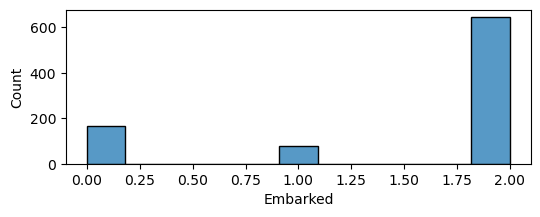

In [38]:
for i in df.columns:
    plt.figure(figsize=(6,2),facecolor="white")
    sns.histplot(x=df[i],data=df)
plt.show()

# Bivariate Analysis

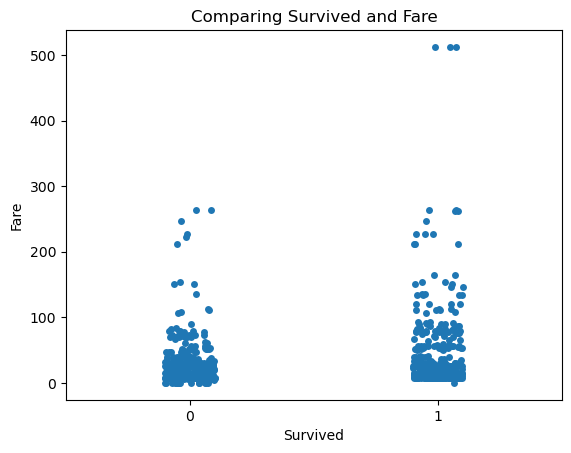

In [39]:
#comparing Survived and Fare
plt.title("Comparing Survived and Fare")
sns.stripplot(x='Survived', y='Fare',data =df)
plt.show()

The difference is of density but not much in low and high fare passenger surivied and non survived rate lets find it by using other plotting technique

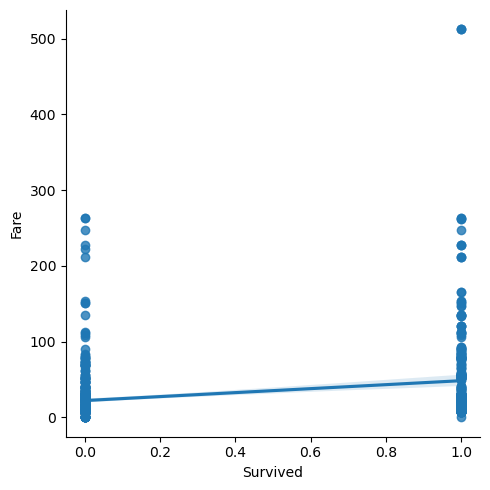

In [40]:
#comparing Survived and Fare

sns.lmplot(x='Survived', y='Fare',data =df,palette="colorblind")


As observe lmplot striplot are not ideal plotting method for this kind of data where maximum value is boolean so ideal graph will be barplot scatter,histogram etc

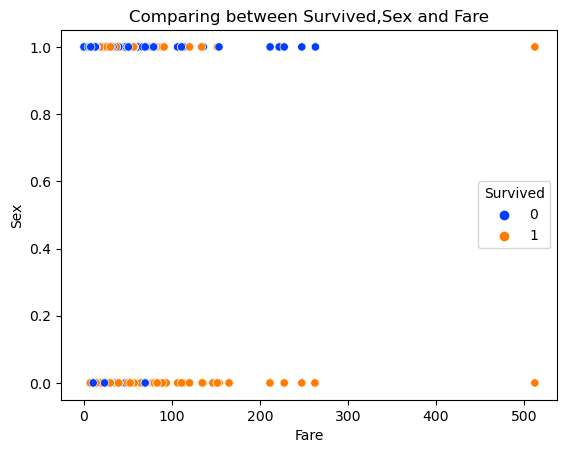

In [41]:
#Comparing Survived and Fare and sex using scatterplot
plt.title("Comparing between Survived,Sex and Fare")
sns.scatterplot(x="Fare",y="Sex",data=df,hue="Survived",palette="bright")
plt.show()

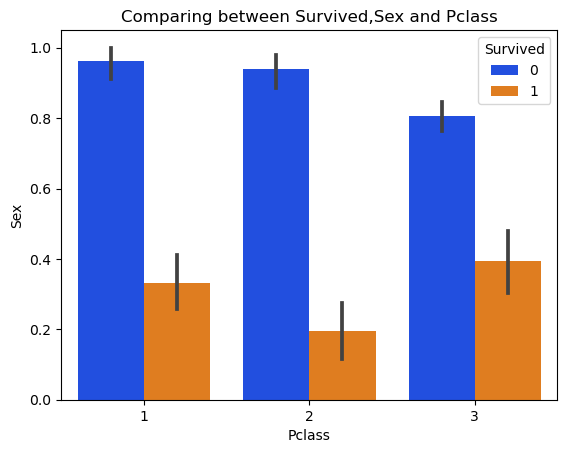

In [42]:
#Comparing Survived and Pclass and sex using Barplot
plt.title("Comparing between Survived,Sex and Pclass")
sns.barplot(x="Pclass",y="Sex",data=df,hue="Survived",palette="bright")
plt.show()

From this observe that pclass has no relationship for sex and survived

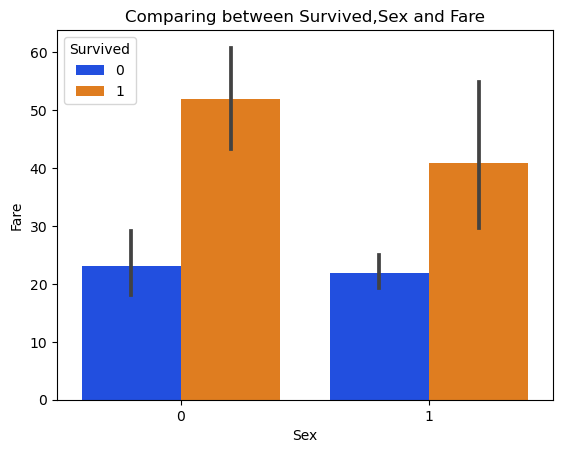

In [43]:
#Comparing Survived and Fare and sex using Barplot
plt.title("Comparing between Survived,Sex and Fare")
sns.barplot(x="Sex",y="Fare",data=df,hue="Survived",palette="bright")
plt.show()

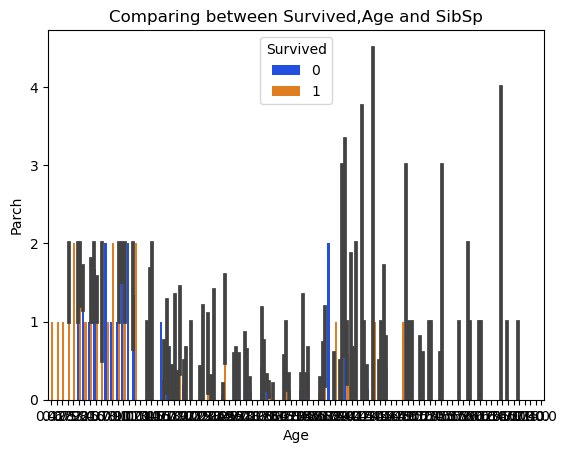

In [44]:
#Comparing Survived Age SibSp using Barplot
plt.title("Comparing between Survived,Age and SibSp")
sns.barplot(x="Age",y="Parch",data=df,hue="Survived",palette="bright")
plt.show()

From this observe that female has more survied than male with approx same fare

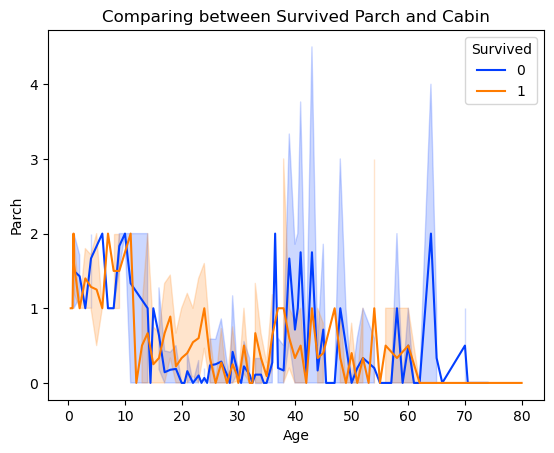

In [45]:
#Comparing Survived Parch and Age
plt.title("Comparing between Survived Parch and Age")
sns.lineplot(x="Age",y="Parch",data=df,hue="Survived",palette="bright")
plt.show()

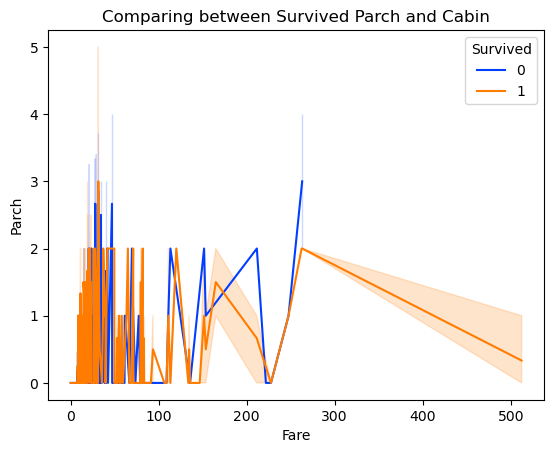

In [47]:
#Comparing Survived Fare and Parch
plt.title("Comparing between Survived Parch and Cabin")
sns.lineplot(x="Fare",y="Parch",data=df,hue="Survived",palette="bright")
plt.show()

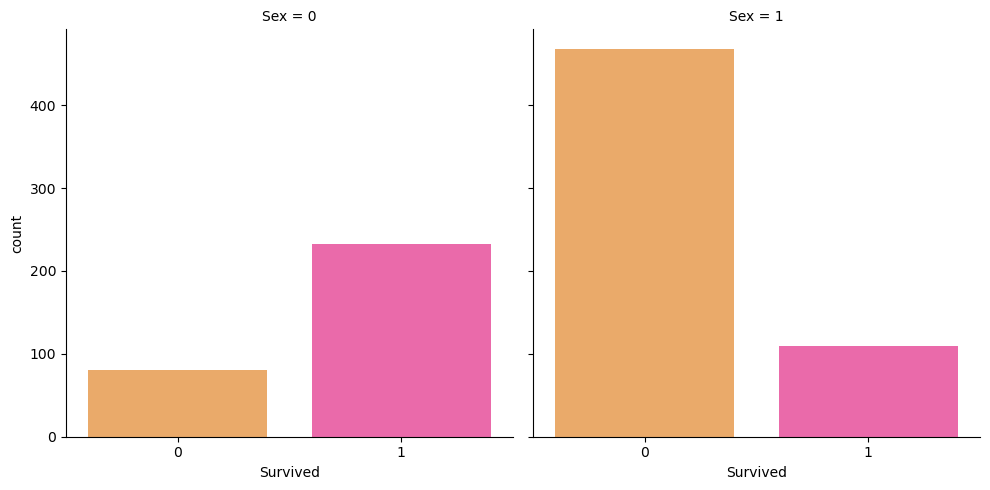

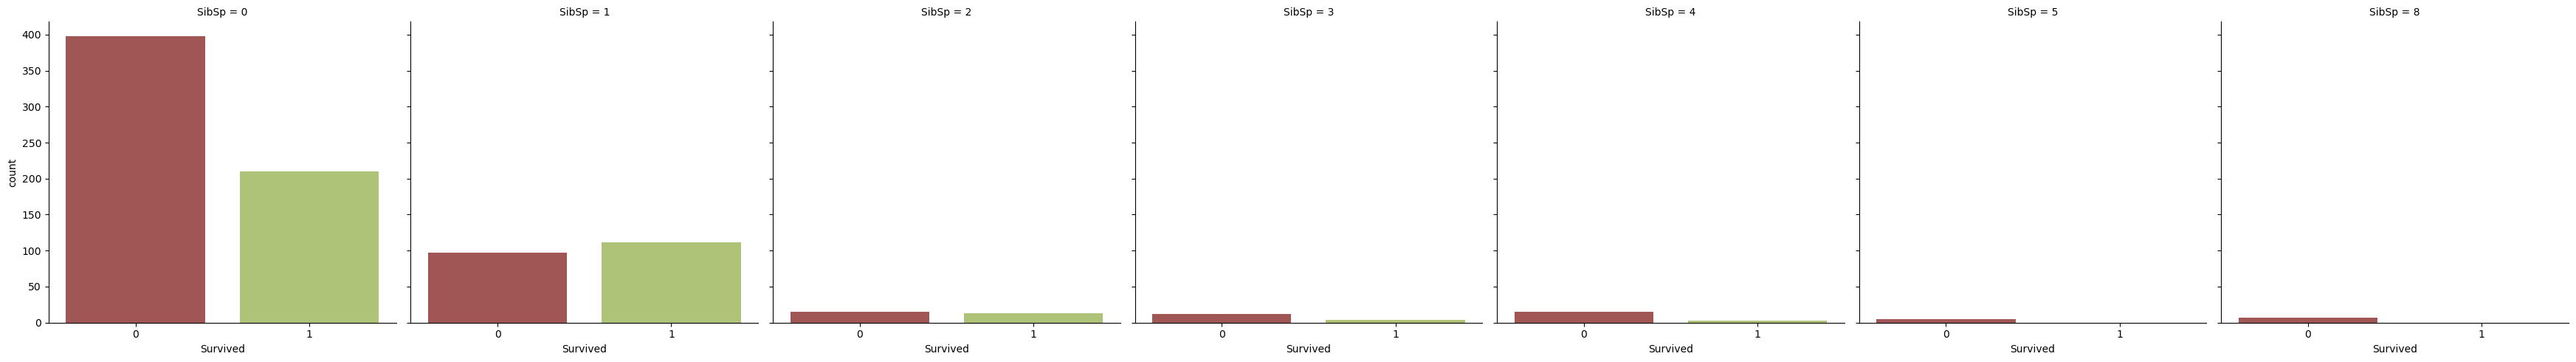

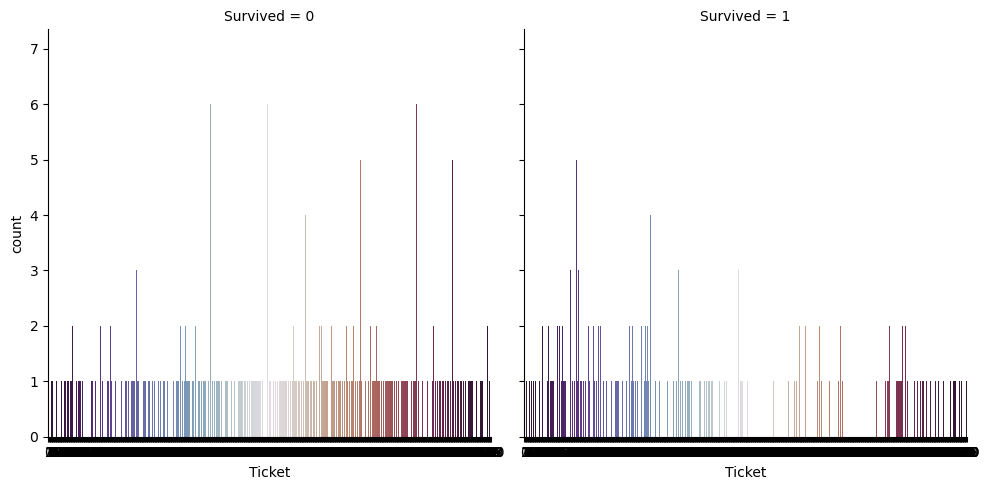

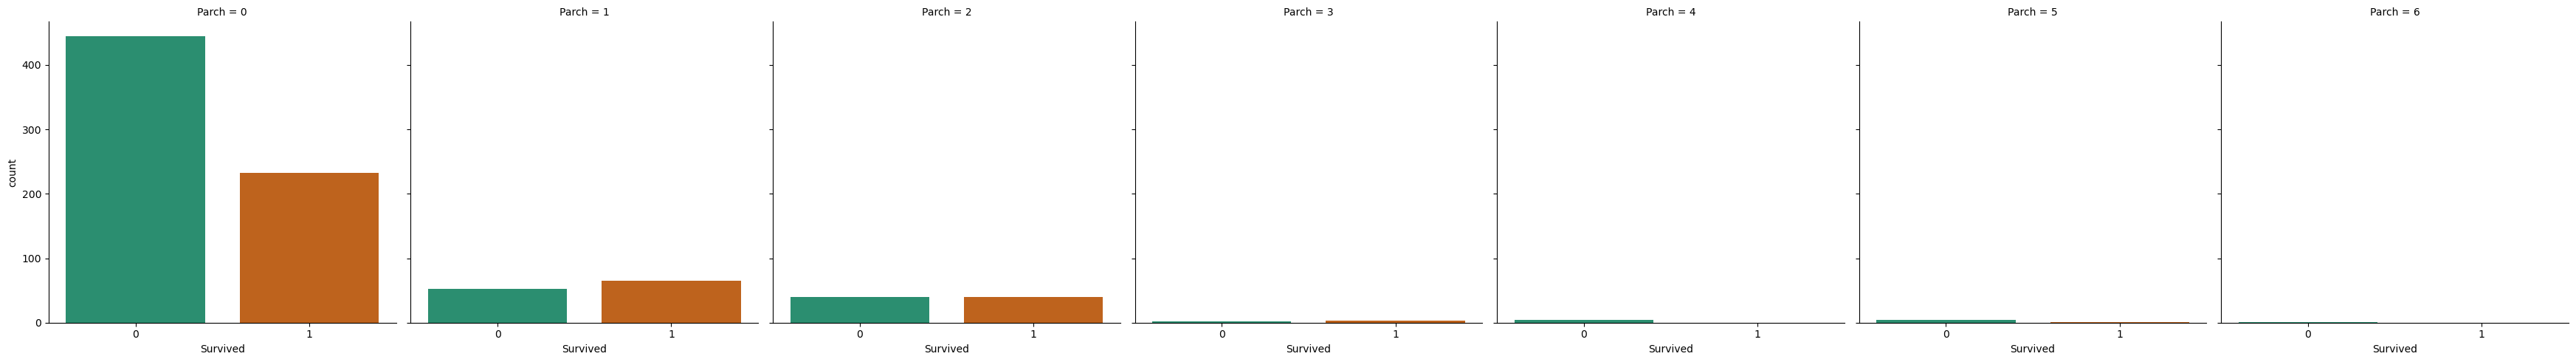

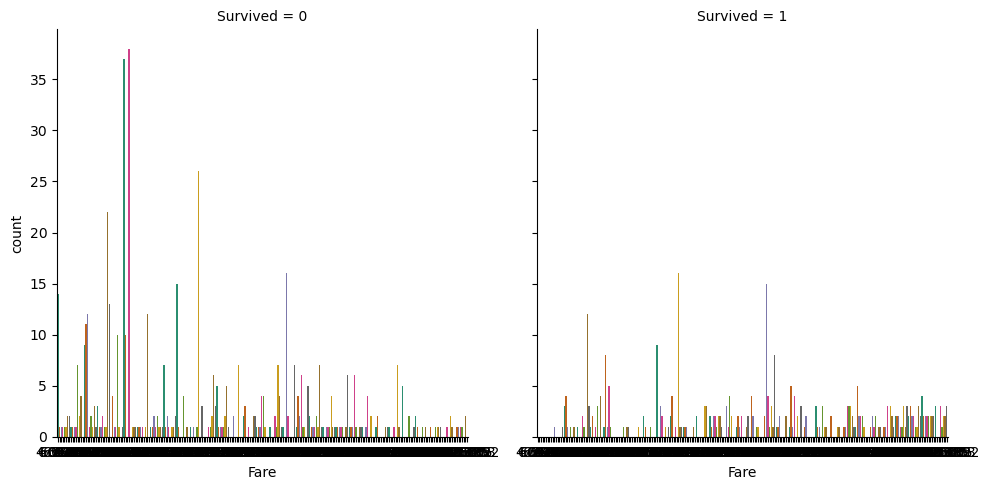

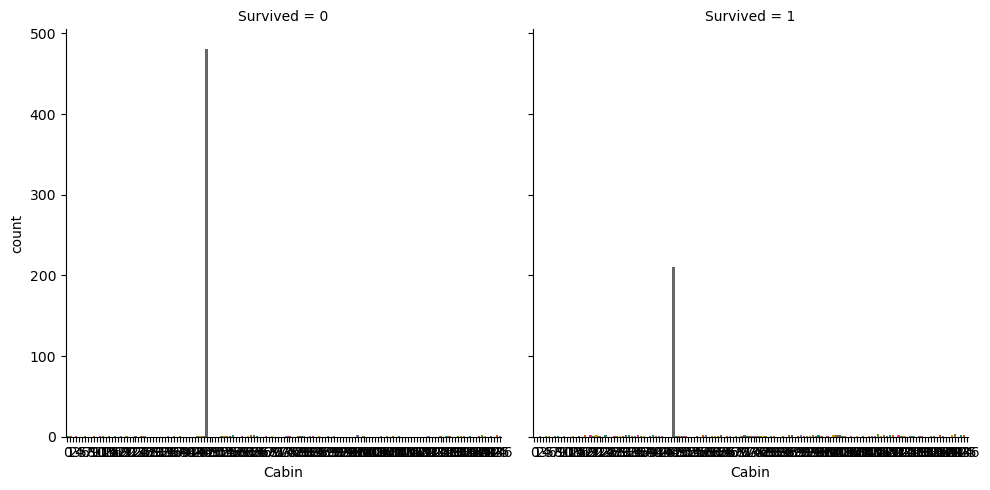

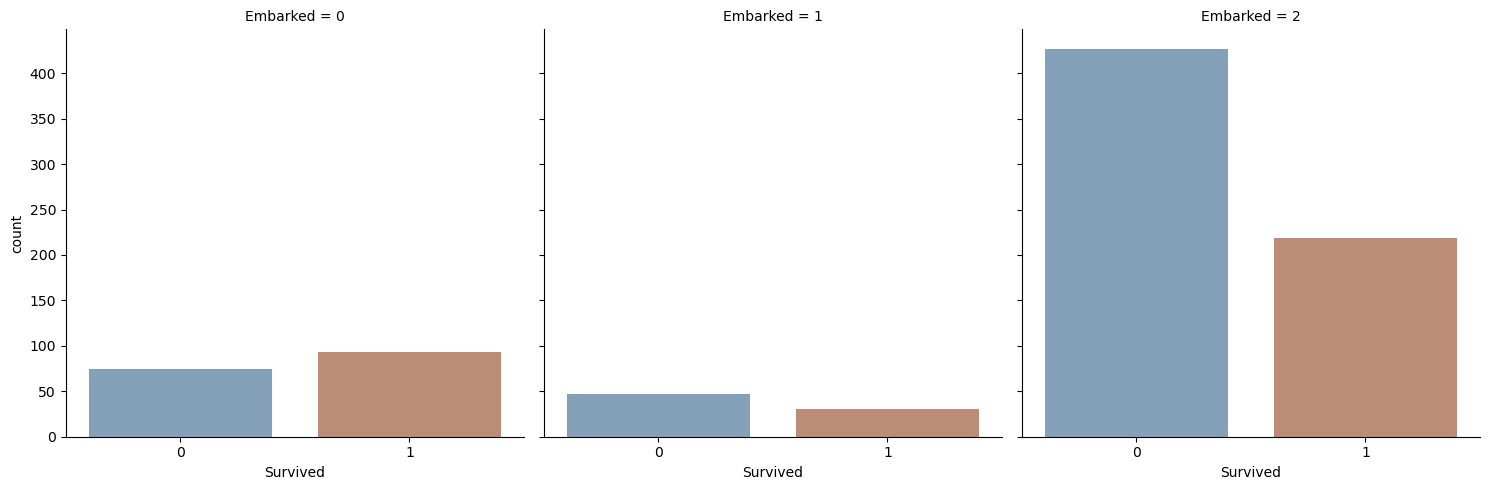

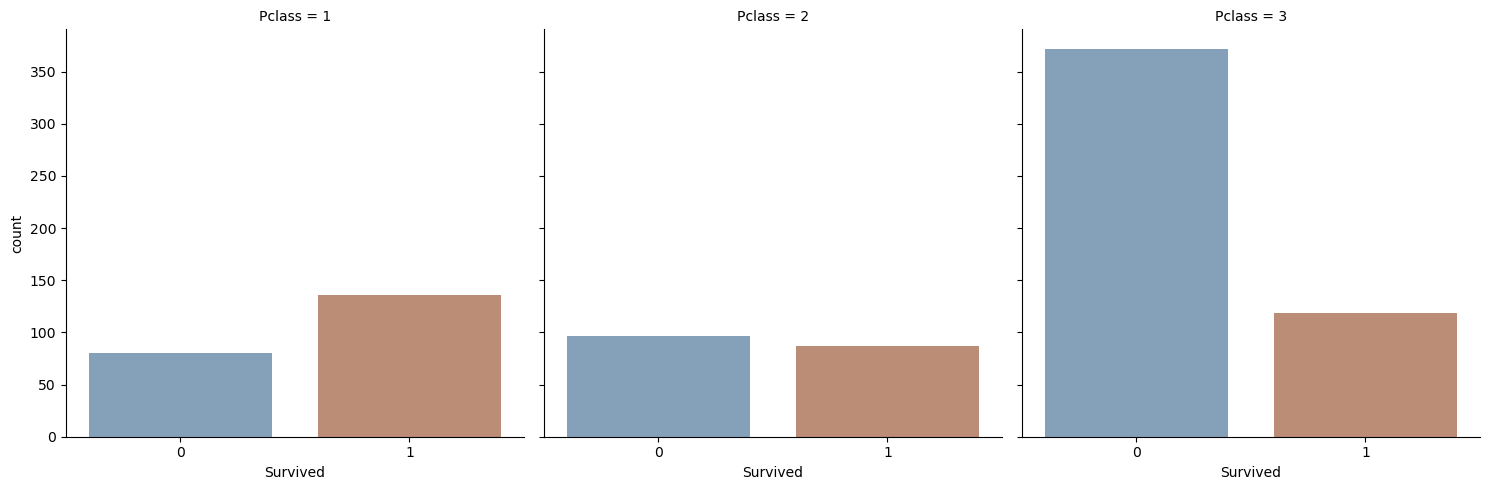

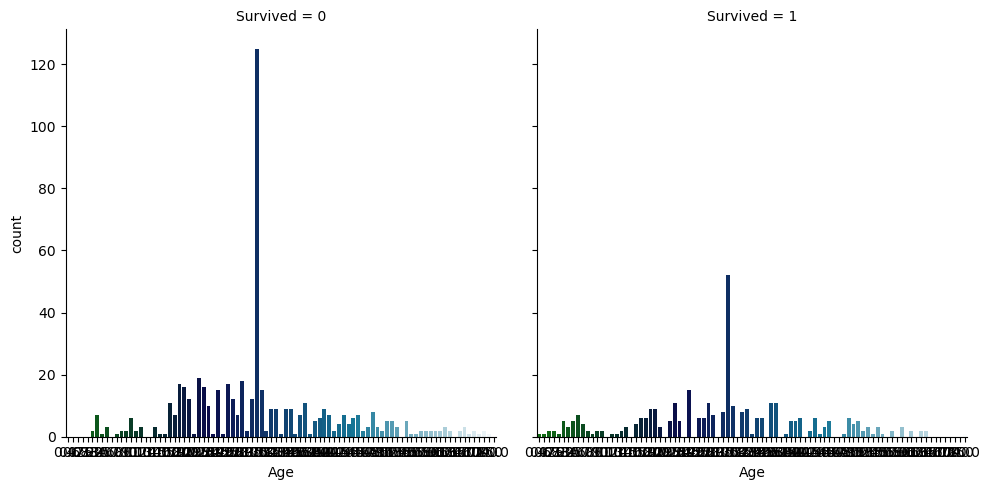

In [48]:
#Checking the Target with 
sns.catplot(x="Survived",col="Sex",data =df, kind="count",palette="spring_r")

sns.catplot(x="Survived",col="SibSp",data =df, kind="count",palette="tab20b_r")

sns.catplot(x="Ticket",col="Survived",data =df, kind="count",palette="twilight_shifted")


sns.catplot(x="Survived",col="Parch",data =df, kind="count",palette="Dark2")

sns.catplot(x="Fare",col="Survived",data =df, kind="count",palette="Dark2")

sns.catplot(x="Cabin",col="Survived",data =df, kind="count",palette="Dark2")

sns.catplot(x="Survived",col="Embarked",data =df, kind="count",palette="twilight_shifted")

sns.catplot(x="Survived",col="Pclass",data =df, kind="count",palette="twilight_shifted")

sns.catplot(x="Age",col="Survived",data =df, kind="count",palette="ocean")

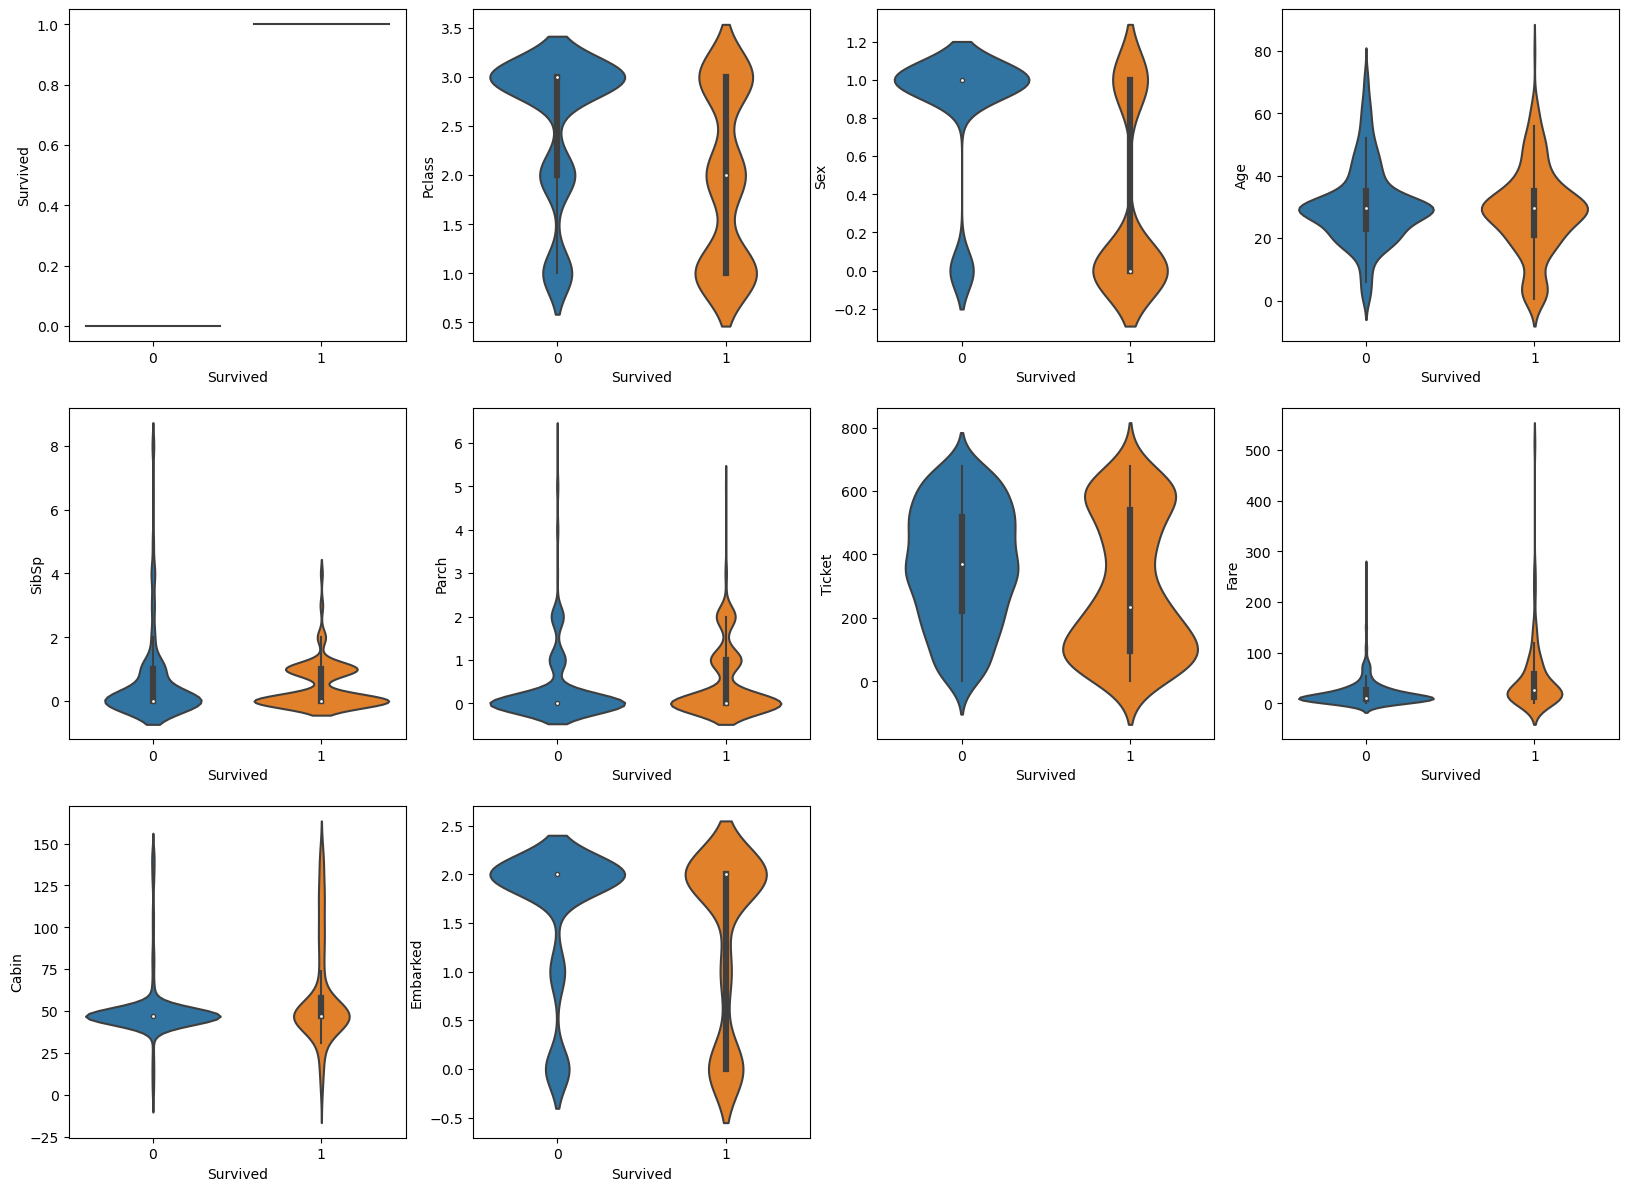

In [49]:
#Comparing charges with other columns using Violin plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=12:
        plt.subplot(5,4,p)
        sns.violinplot(x="Survived",y=i, data =df)
        plt.xlabel("Survived")
        plt.ylabel(i)
    p+=1
plt.show()

Non survival rate is high in pclass 3  and 0 survival is high with few segment of sibsp and Embarked

# Multivariate Analysis

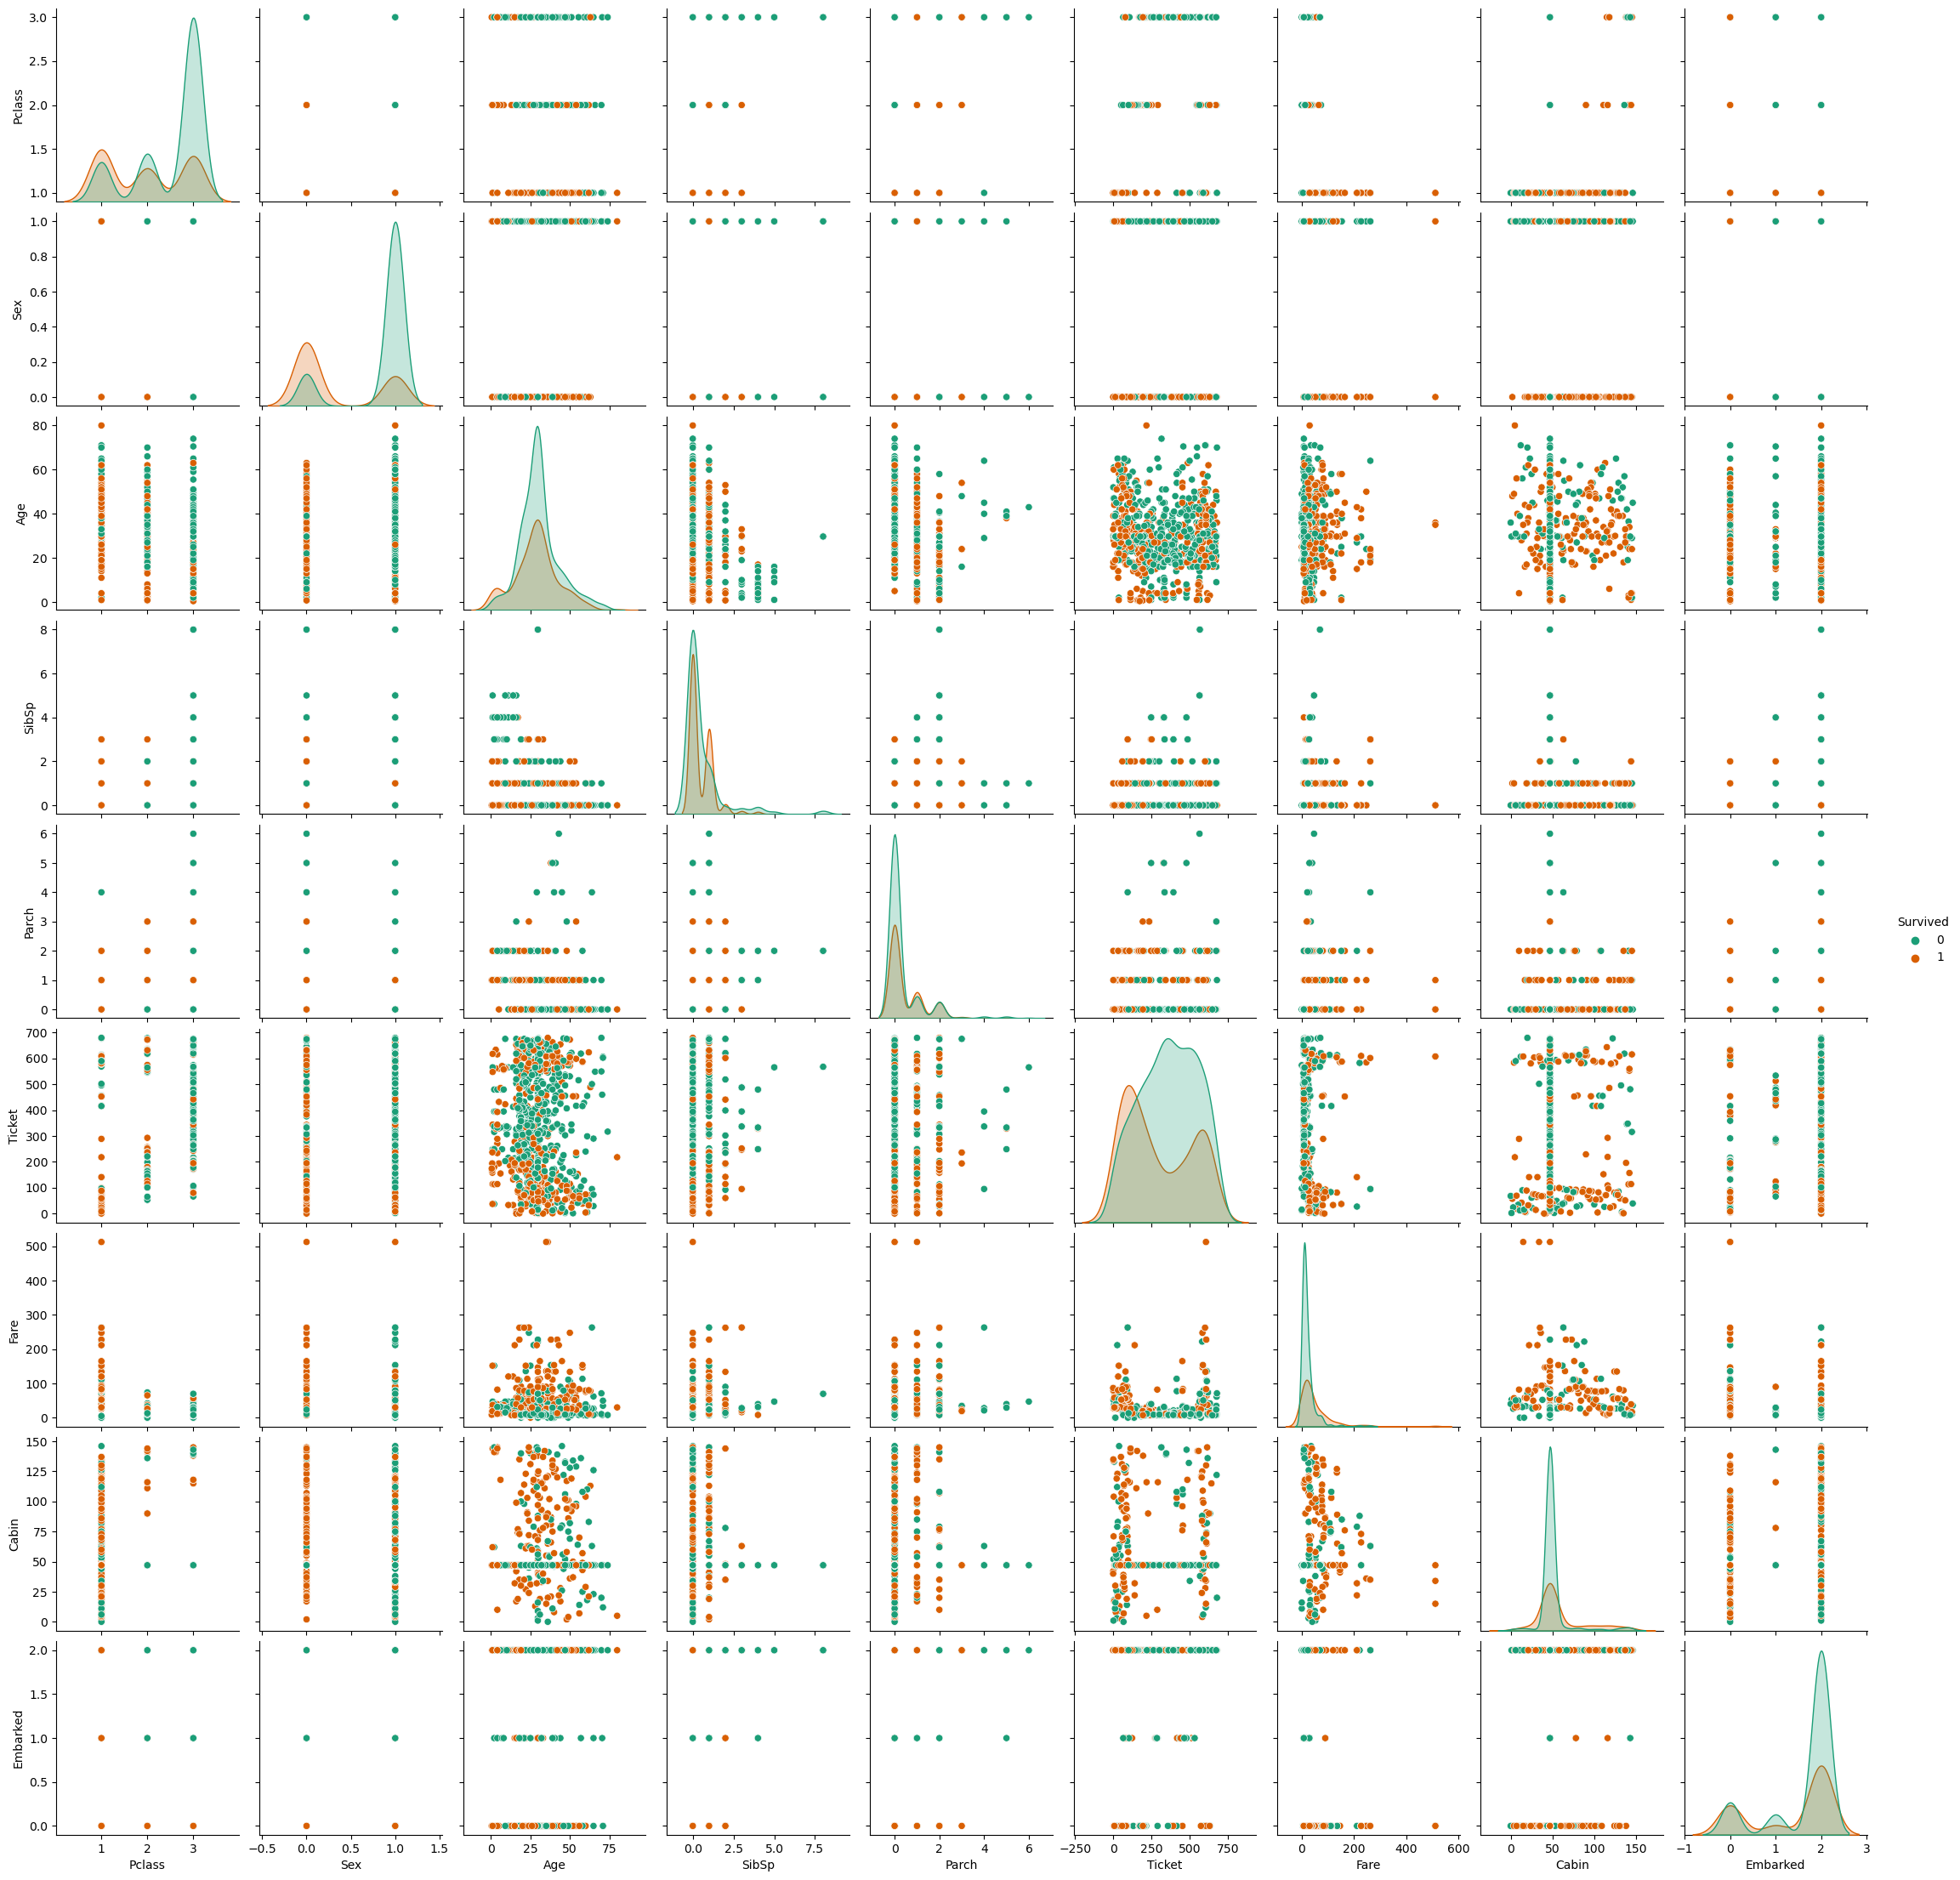

In [50]:
sns.pairplot(df,hue="Survived", palette="Dark2")

From Multivariate analysis we study each graph pclass is high indicate 0 sex column male is more tends towards 0 age column show high age is towards 0  viceversa and embarked value 2 is higher for 0 so dataset plotting graph finds the pattern and behaviour of features with target and their density present in each columns

# Checking for outliers

In [52]:

from scipy.stats import zscore
out_features = df[["Age","Cabin","Fare","Ticket"]]
z=np.abs(zscore(out_features))
z

,Age,Cabin,Fare,Ticket
PassengerId,,,,
1,0.592481,0.281881,0.502445,0.918966
2,0.638789,1.161545,0.786845,1.282625
3,0.284663,0.281881,0.488854,1.646283
4,0.407926,0.057748,0.420730,1.442322
5,0.407926,0.281881,0.486337,0.664904
...,...,...,...,...
887,0.207709,0.281881,0.386671,1.183277
888,0.823344,1.003594,0.044381,1.616678
889,0.000000,0.281881,0.176263,1.676173


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int32  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    int32  
 9   Embarked  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 94.9 KB


In [54]:
np.where(z>3)

(array([  6,  10,  27,  66,  75,  88,  96, 116, 118, 128, 148, 183, 193,
        205, 251, 258, 262, 299, 309, 311, 337, 339, 340, 341, 345, 370,
        377, 380, 394, 434, 438, 456, 462, 493, 516, 527, 557, 558, 577,
        585, 618, 630, 662, 672, 679, 689, 699, 700, 715, 716, 724, 730,
        737, 742, 745, 772, 776, 779, 809, 835, 851], dtype=int64),
 array([1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
        1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0,
        2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0], dtype=int64))

In [55]:
z.iloc[6,1]

3.1993235238967626

In [56]:
df1= df[(z<3).all(axis=1)]
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,1,22.000000,1,0,523,7.2500,47,2
2,1,1,0,38.000000,1,0,596,71.2833,81,0
3,1,3,0,26.000000,0,0,669,7.9250,47,2
4,1,1,0,35.000000,1,0,49,53.1000,55,2
5,0,3,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,101,13.0000,47,2
888,1,1,0,19.000000,0,0,14,30.0000,30,2
889,0,3,0,29.699118,1,2,675,23.4500,47,2


In [57]:
print("old Data Frame ",df.shape[0])
print("New Data Frame ",df1.shape[0])

old Data Frame  891
New Data Frame  830


In [58]:
print("Data Loss Percentage",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage 6.846240179573512


# Checking for Skewness

In [59]:
df1.skew()

Survived    0.534674
Pclass     -0.761213
Sex        -0.660904
Age         0.272271
SibSp       3.737191
Parch       2.889420
Ticket     -0.002418
Fare        2.316261
Cabin       2.221615
Embarked   -1.311068
dtype: float64

In [60]:
#Removing the skewness using cuberoot method

df1["SibSp"]=np.cbrt(df1["SibSp"])
df1["Parch"]=np.cbrt(df1["Parch"])
df1["Fare"]=np.cbrt(df1["Fare"])
df1["Cabin"]=np.cbrt(df1["Cabin"])

In [61]:
df1.skew()

Survived    0.534674
Pclass     -0.761213
Sex        -0.660904
Age         0.272271
SibSp       1.064884
Parch       1.451816
Ticket     -0.002418
Fare        0.644202
Cabin      -1.198208
Embarked   -1.311068
dtype: float64

# Correlation b/w target variable and independent variable

# Multicollinearity 

In [62]:
df1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.334992,-0.531745,-0.041064,0.051745,0.117865,-0.177520,0.316662,0.142813,-0.158795
Pclass,-0.334992,1.000000,0.126498,-0.329795,-0.010473,0.017779,0.344767,-0.633972,-0.123969,0.138685
Sex,-0.531745,0.126498,1.000000,0.064510,-0.188514,-0.254964,0.075173,-0.261781,-0.082494,0.104006
Age,-0.041064,-0.329795,0.064510,1.000000,-0.187435,-0.253948,-0.096024,0.105715,0.057648,-0.016933
SibSp,0.051745,-0.010473,-0.188514,-0.187435,1.000000,0.462451,0.052486,0.405913,0.049145,0.007195
Parch,0.117865,0.017779,-0.254964,-0.253948,0.462451,1.000000,0.024309,0.336489,0.028722,0.019331
Ticket,-0.177520,0.344767,0.075173,-0.096024,0.052486,0.024309,1.000000,-0.120977,0.058393,0.049701
Fare,0.316662,-0.633972,-0.261781,0.105715,0.405913,0.336489,-0.120977,1.000000,0.160886,-0.167544
Cabin,0.142813,-0.123969,-0.082494,0.057648,0.049145,0.028722,0.058393,0.160886,1.000000,0.024731
Embarked,-0.158795,0.138685,0.104006,-0.016933,0.007195,0.019331,0.049701,-0.167544,0.024731,1.000000


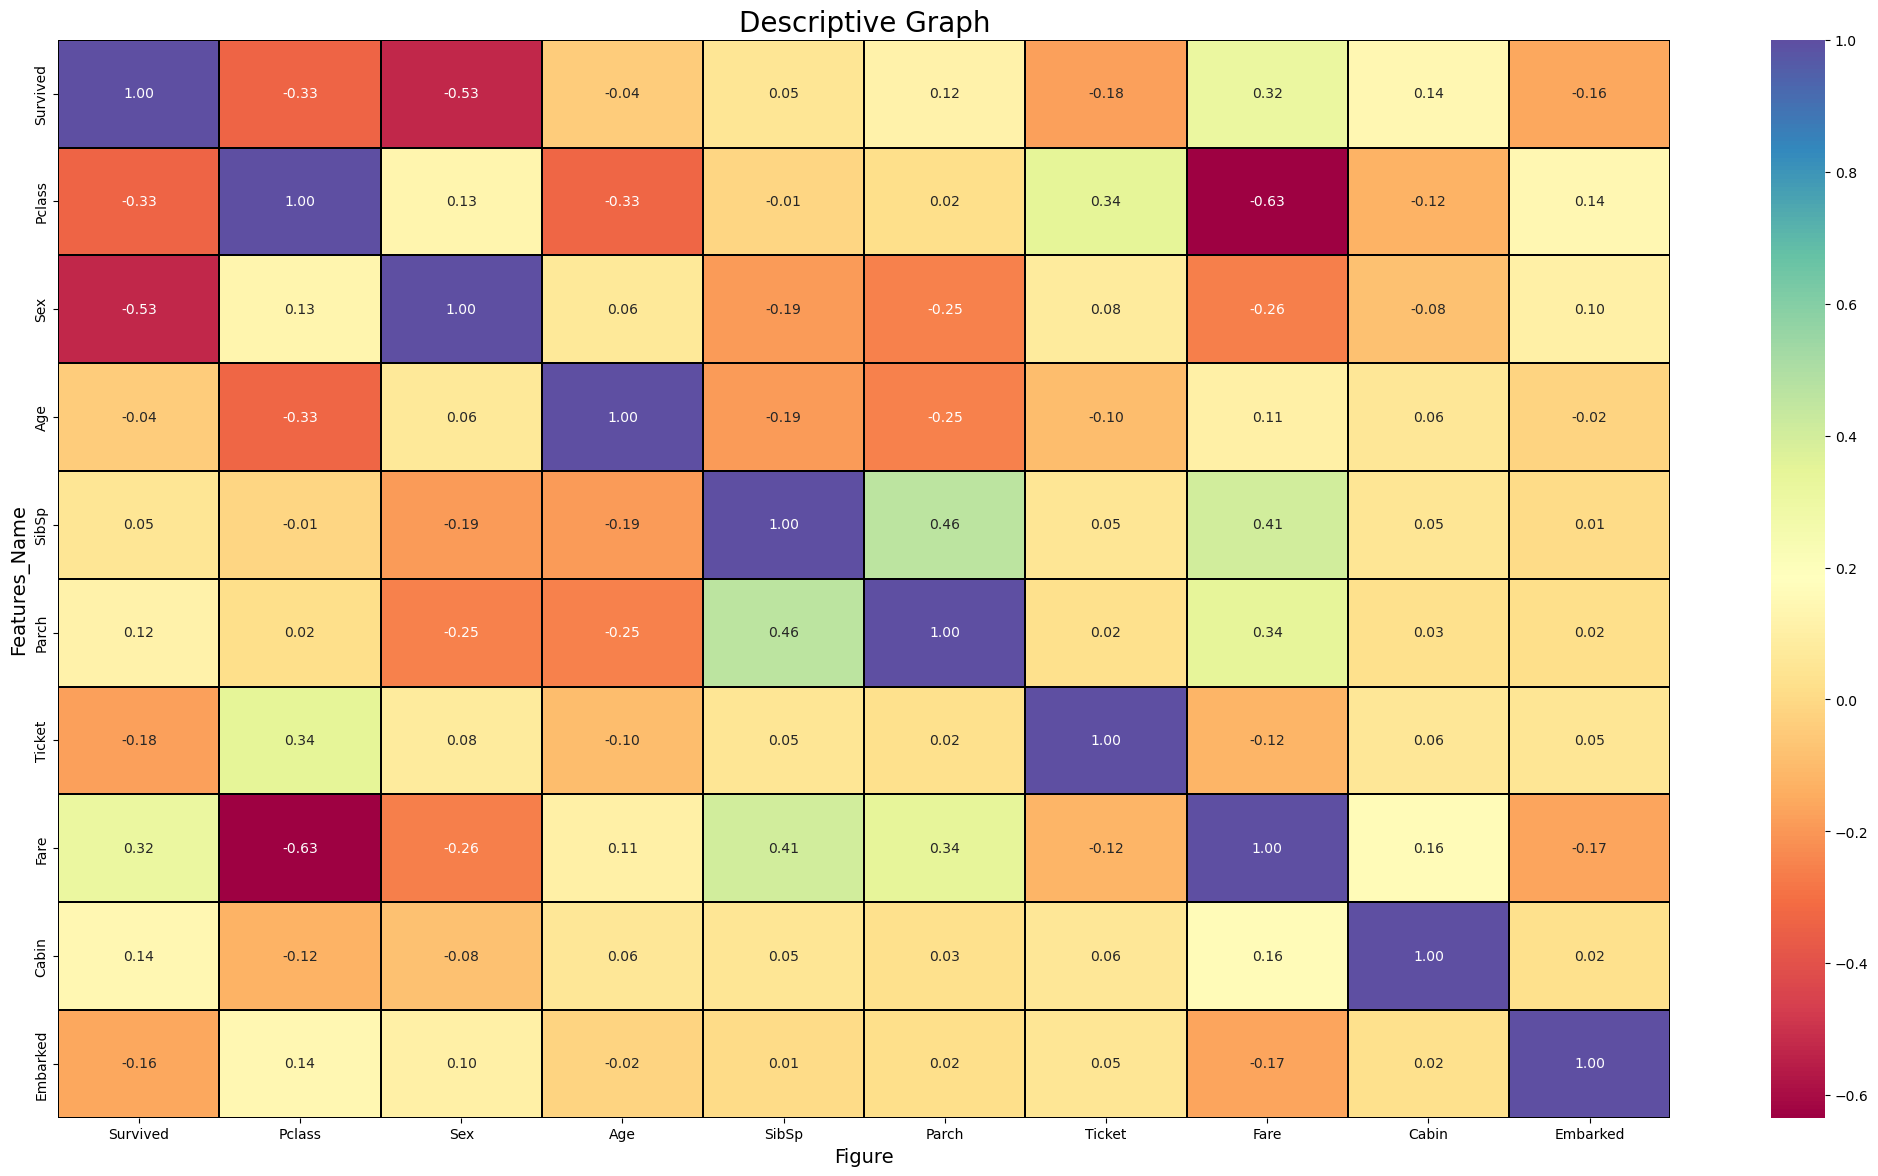

In [63]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt="0.2f",linewidth = 0.2,linecolor="black", cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.ylabel("Features_Name", fontsize=14)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

In [65]:
df1.corr().Survived.sort_values(ascending=False)

Survived    1.000000
Fare        0.316662
Cabin       0.142813
Parch       0.117865
SibSp       0.051745
Age        -0.041064
Embarked   -0.158795
Ticket     -0.177520
Pclass     -0.334992
Sex        -0.531745
Name: Survived, dtype: float64

# Visualizing the correlation between label and features using bar plot

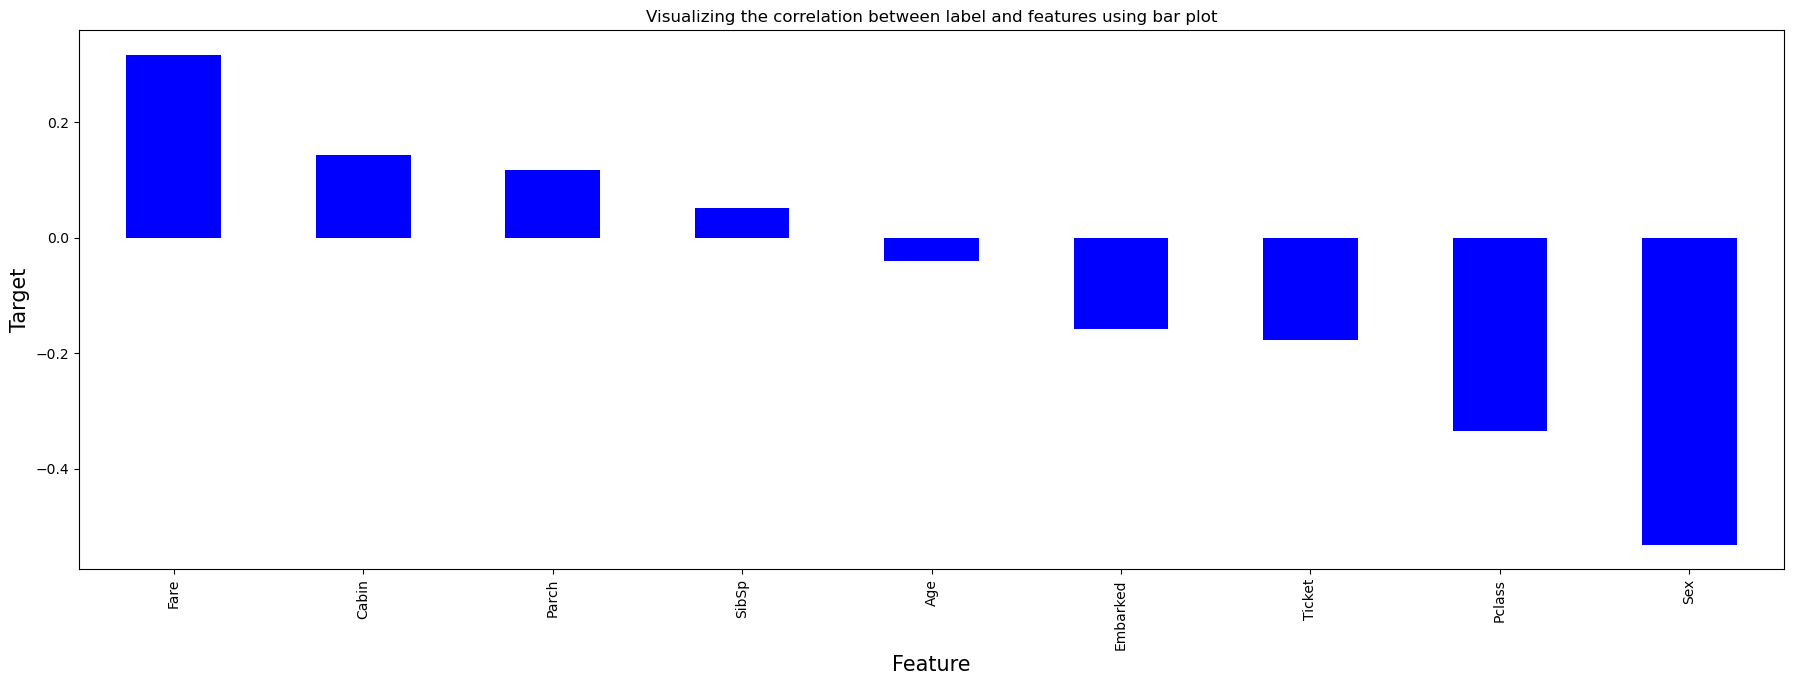

In [66]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(22,7))
df1.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Visualizing the correlation between label and features using bar plot')
plt.show()

# Separating features and label

In [67]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

# Feature Scaling using Standard Scalarization

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.782322,0.723143,-0.592143,1.196453,-0.528896,0.929345,-0.790515,-0.106230,0.577064
1,-1.686604,-1.382852,0.712138,1.196453,-0.528896,1.299155,1.619174,1.633893,-1.991103
2,0.782322,-1.382852,-0.266073,-0.653194,-0.528896,1.668964,-0.726981,-0.106230,0.577064
3,-1.686604,-1.382852,0.467585,1.196453,-0.528896,-1.471883,1.196643,0.364299,0.577064
4,0.782322,0.723143,0.467585,-0.653194,-0.528896,0.670985,-0.715615,-0.106230,0.577064
...,...,...,...,...,...,...,...,...,...
825,-0.452141,0.723143,-0.184555,-0.653194,-0.528896,-1.208457,-0.337219,-0.106230,0.577064
826,-1.686604,-1.382852,-0.836696,-0.653194,-0.528896,-1.649189,0.486651,-1.322008,0.577064
827,0.782322,-1.382852,0.035470,1.196453,2.070248,1.699360,0.219687,-0.106230,0.577064
828,-1.686604,0.723143,-0.266073,-0.653194,-0.528896,-1.679584,0.486651,0.635563,-1.991103


# Checking Variance Inflation Factor(VIF)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Feature"]= x.columns

vif

,VIF values,Feature
0,2.385074,Pclass
1,1.129131,Sex
2,1.221825,Age
3,1.518781,SibSp
4,1.472909,Parch
5,1.174740,Ticket
6,2.612562,Fare
7,1.044662,Cabin
8,1.051158,Embarked


As we can seen that now all the value are in range so it doesnot  show  any multicollinearity and also limited dataset not suitable for dropping any column or rows.Now we can move to next step for model building

In [70]:
y.value_counts()

0    522
1    308
Name: Survived, dtype: int64

Here we can observe that the data for target column is not balanced or biasness is present

# Oversampling 

In [71]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

# Modelling

# Finding the best random state

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size = 0.30,random_state= i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    predRFC=RFC.predict(x_test)
    acc=accuracy_score(y_test,predRFC)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu,"at random_state", maxRS)

Best accuracy is  0.8949044585987261 at random_state 78


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=maxRS)

# Classification Algorithms

In [74]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [75]:
#Checking accuracy for RandomForestClassifier
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9043062200956937
[[99  9]
 [11 90]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       108
           1       0.91      0.89      0.90       101

    accuracy                           0.90       209
   macro avg       0.90      0.90      0.90       209
weighted avg       0.90      0.90      0.90       209



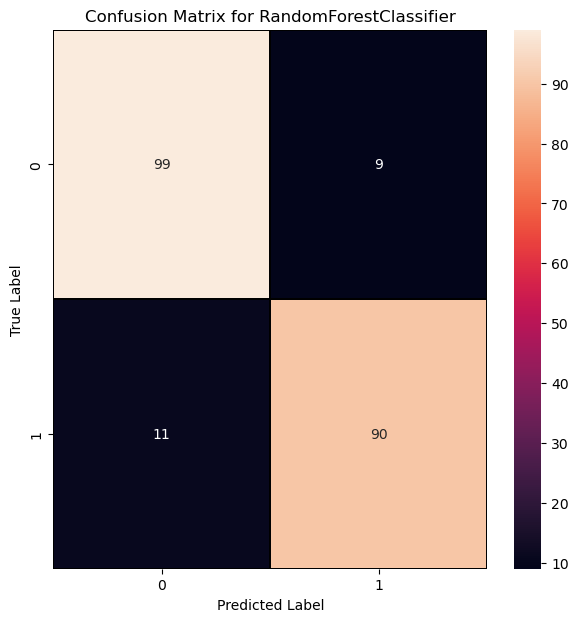

In [76]:
#Graphical confusion matrix for RandomForestClassifier

cm=confusion_matrix(y_test,predRFC)

x_axis_label=["0","1"]
y_axis_label=["0","1"]

fig,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True,linewidths = 0.2, linecolor="black",fmt=".0f",ax=ax,xticklabels=x_axis_label,yticklabels=y_axis_label)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

In [77]:
#Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8086124401913876
[[88 20]
 [20 81]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.80      0.80      0.80       101

    accuracy                           0.81       209
   macro avg       0.81      0.81      0.81       209
weighted avg       0.81      0.81      0.81       209



In [78]:
#Checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8660287081339713
[[96 12]
 [16 85]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       108
           1       0.88      0.84      0.86       101

    accuracy                           0.87       209
   macro avg       0.87      0.87      0.87       209
weighted avg       0.87      0.87      0.87       209



In [79]:
#Checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8995215311004785
[[100   8]
 [ 13  88]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       108
           1       0.92      0.87      0.89       101

    accuracy                           0.90       209
   macro avg       0.90      0.90      0.90       209
weighted avg       0.90      0.90      0.90       209



In [80]:
#Checking accuracy for AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC= ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.861244019138756
[[95 13]
 [16 85]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       108
           1       0.87      0.84      0.85       101

    accuracy                           0.86       209
   macro avg       0.86      0.86      0.86       209
weighted avg       0.86      0.86      0.86       209



In [81]:
#Checking accuracy for BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9234449760765551
[[102   6]
 [ 10  91]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       108
           1       0.94      0.90      0.92       101

    accuracy                           0.92       209
   macro avg       0.92      0.92      0.92       209
weighted avg       0.92      0.92      0.92       209



In [82]:
#Checking accuracy for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9090909090909091
[[97 11]
 [ 8 93]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       108
           1       0.89      0.92      0.91       101

    accuracy                           0.91       209
   macro avg       0.91      0.91      0.91       209
weighted avg       0.91      0.91      0.91       209



Accuracy score for Bagging is 92.34 and ExtraTreesClassifier is 90.90 ,Random forest classifer 90.43 So best model performance is 92.34

# Spliting train test data using Cross validation score

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
#Checking cv score for random forest classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",accuracy_score(y_test,predRFC)-score.mean())

[0.79904306 0.84688995 0.83732057 0.86602871 0.88942308]
0.8477410747147589
Difference between Accuracy score and Cross validation score is : 0.05656514538093482


In [85]:
#Checking cv score for Logistic classifier
score1=cross_val_score(LR,x1,y1)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and Cross validation score is :",accuracy_score(y_test,predLR)-score1.mean())

[0.74641148 0.80861244 0.76555024 0.784689   0.83173077]
0.7873987854251012
Difference between Accuracy score and Cross validation score is : 0.02121365476628634


In [87]:
#Checking cv score for Bagging Classifier
score2=cross_val_score(BC,x,y)
print(score2)
print(score2.mean())
print("Difference between Accuracy score and Cross validation score is :", accuracy_score(y_test, predBC)-score2.mean())

[0.80722892 0.79518072 0.86746988 0.78915663 0.87951807]
0.827710843373494
Difference between Accuracy score and Cross validation score is : 0.09573413270306108


In [88]:
#Checking cv score for ExtraTrees classifier
score3=cross_val_score(ET,x1,y1)
print(score3)
print(score3.mean())
print("Difference between Accuracy score and Cross validation score is :",accuracy_score(y_test,predET)-score3.mean())

[0.80382775 0.83253589 0.85167464 0.88516746 0.87980769]
0.8506026867868972
Difference between Accuracy score and Cross validation score is : 0.05848822230401185


# Hyper Parameter Tuning

In [89]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {"criterion" : ["gini","entropy"],
             "random_state" : [10,50,1000],
             "max_depth" : [None,10,20],
             "n_jobs" : [-2,-1,1],
             "n_estimators" : [50,100,200,300]}

In [91]:
GCV= GridSearchCV(ExtraTreesClassifier(max_depth=None),parameters, cv = 5)

In [92]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [93]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [94]:
ET_model=ExtraTreesClassifier(criterion = "gini",max_depth = 20, n_jobs =-2, n_estimators= 200, random_state= 1000)
ET_model.fit(x_train,y_train)
pred=ET_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

89.47368421052632
[[97 11]
 [11 90]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       108
           1       0.89      0.89      0.89       101

    accuracy                           0.89       209
   macro avg       0.89      0.89      0.89       209
weighted avg       0.89      0.89      0.89       209



In [ ]:
# BaggingClassifier

In [110]:
parameters1 = {"n_estimators" : [10,20,30],
             "max_samples" : [1.0,2.0,3.0],
             "max_features" : [1.0,2.0,3.0],
             "bootstrap" : [True,False],
              "n_jobs": [1,-1,-2],
              "random_state":[100,200,500,1000],
              "verbose":[0,1,2]}

In [111]:
GCV1= GridSearchCV(BaggingClassifier(),parameters1, cv = 5)

In [112]:
GCV1.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Don

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run (total 20)...
Building estimator 17 of 20 for this parallel run (total 20)...
Building estimator 18 of 20 for this parallel run (total 20)...
Building estimator 19 of 20 for this parallel run (total 20)...
Building estimator 20 of 20 for this parallel run (total 20)...
Building estimator 1 of 20 for this parallel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run (total 20)...
Building estimator 17 of 20 for this parallel run (total 20)...
Building estimator 18 of 20 for this parallel run (total 20)...
Building estimator 19 of 20 for this parallel run (total 20)...
Building estimator 20 of 20 for this parallel run (total 20)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run (total 20)...
Building estimator 17 of 20 for this parallel run (total 20)...
Building estimator 18 of 20 for this parallel r

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run (total 20)...
Building estimator 17 of 20 for this parallel run (total 20)...
Building estimator 18 of 20 for this parallel run (total 20)...
Building estimator 19 of 20 for this parallel run (total 20)...
Building estimator 20 of 20 for this parallel run (total 20)...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Don

Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel run (total 30)...
Building estimator 19 of 30 for this parallel run (total 30)...
Building estimator 20 of 30 for this parallel run (total 30)...
Building estimator 21 of 30 for this parallel run (total 30)...
Building estimator 22 of 30 for this parallel run (total 30)...
Building estimator 23 of 30 for this parallel run (total 30)...
Building estimator 24 of 30 for this parallel run (total 30)...
Building estimator 25 of 30 for this parallel run (total 30)...
Building estimator 26 of 30 for this par

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel r

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 25 of 30 for this parallel run (total 30)...
Building estimator 26 of 30 for this parallel run (total 30)...
Building estimator 27 of 30 for this parallel run (total 30)...
Building estimator 28 of 30 for this parallel run (total 30)...
Building estimator 29 of 30 for this parallel run (total 30)...
Building estimator 30 of 30 for this parallel run (total 30)...
Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel run (total 30)...
Building estimator 19 of 30 for this parallel run (total 30)...
Building estimator 20 of 30 for this parallel run (total 30)...
Building estimator 21 of 30 for this parallel run (total 30)...
Building estimator 22 of 30 for this parallel run (total 30)...
Building estimator 23 of 30 for this parallel run (total 30)...
Building estimator 24 of 30 for this parallel run (total 30)...
Building estimator 25 of 30 for this parallel run (total 30)...
Building estimator 26 of 30 for this parallel run (total 30)...
Building estimator 27 of 30 for this parallel run (total 30)...
Building estimator 28 of 30 for this par

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel run (total 30)...
Building estimator 19 of 30 for this parallel run (total 30)...
Building estimator 20 of 30 for this parallel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel run (total 30)...
Building estimator 19 of 30 for this parallel run (total 30)...
Building estimator 20 of 30 for this parallel run (total 30)...
Building estimator 21 of 30 for this parallel run (total 30)...
Building estimator 22 of 30 for this parallel run (total 30)...
Building estimator 23 of 30 for this parallel run (total 30)...
Building estimator 24 of 30 for this parallel run (total 30)...
Building estimator 25 of 30 for this parallel run (total 30)...
Building estimator 26 of 30 for this parallel run (total 30)...
Building estimator 27 of 30 for this parallel run (total 30)...
Building estimator 28 of 30 for this parallel run (total 30)...
Building estimator 29 of 30 for this parallel run (total 30)...
Building estimator 30 of 30 for this par

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel run (total 30)...
Building estimator 19 of 30 for this parallel run (total 30)...
Building estimator 20 of 30 for this parallel run (total 30)...
Building estimator 21 of 30 for this parallel run (total 30)...
Building estimator 22 of 30 for this parallel run (total 30)...
Building estimator 23 of 30 for this parallel run (total 30)...
Building estimator 24 of 30 for this parallel run (total 30)...
Building estimator 25 of 30 for this parallel run (total 30)...
Building estimator 26 of 30 for this parallel run (total 30)...
Building estimator 27 of 30 for this par

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jo

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Don

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 20 of 20 for this parallel run (total 20)...
Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run (total 20)...
Building estimator 17 of 20 for this parallel run (total 20)...
Building estimator 18 of 20 for this parallel run (total 20)...
Building estimator 19 of 20 for this parallel run (total 20)...
Building estimator 20 of 20 for this parallel run (total 20)...
Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel ru

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 17 of 20 for this parallel run (total 20)...
Building estimator 18 of 20 for this parallel run (total 20)...
Building estimator 19 of 20 for this parallel run (total 20)...
Building estimator 20 of 20 for this parallel run (total 20)...
Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 20 of 20 for this parallel run (total 20)...
Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run (total 20)...
Building estimator 17 of 20 for this parallel run (total 20)...
Building estimator 18 of 20 for this parallel run (total 20)...
Building estimator 19 of 20 for this parallel run (total 20)...
Building estimator 20 of 20 for this parallel run (total 20)...
Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel ru

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run (total 20)...
Building estimator 17 of 20 for this parallel run (total 20)...
Building estimator 18 of 20 for this parallel run (total 20)...
Building estimator 19 of 20 for this parallel run (total 20)...
Building estimator 20 of 20 for this parallel run (total 20)...
Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jo

Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel run (total 30)...
Building estimator 19 of 30 for this parallel run (total 30)...
Building estimator 20 of 30 for this parallel run (total 30)...
Building estimator 21 of 30 for this parallel run (total 30)...
Building estimator 22 of 30 for this parallel run (total 30)...
Building estimator 23 of 30 for this parallel run (total 30)...
Building estimator 24 of 30 for this parallel run (total 30)...
Building estimator 25 of 30 for this par

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jo

Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel run (total 30)...
Building estimator 19 of 30 for this parallel run (total 30)...
Building estimator 20 of 30 for this parallel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel run (total 30)...
Building estimator 19 of 30 for this parallel run (total 30)...
Building estimator 20 of 30 for this parallel run (total 30)...
Building estimator 21 of 30 for this parallel run (total 30)...
Building estimator 22 of 30 for this parallel run (total 30)...
Building estimator 23 of 30 for this parallel run (total 30)...
Building estimator 24 of 30 for this parallel run (total 30)...
Building estimator 25 of 30 for this parallel run (total 30)...
Building estimator 26 of 30 for this parallel run (total 30)...
Building estimator 27 of 30 for this parallel run (total 30)...
Building estimator 28 of 30 for this parallel run (total 30)...
Building estimator 29 of 30 for this parallel run (total 30)...
Building estimator 30 of 30 for this parallel run (total 30)...
Building estimator 1 of 30 for this para

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel run (total 30)...
Building estimator 19 of 30 for this parallel run (total 30)...
Building estimator 20 of 30 for this parallel run (total 30)...
Building estimator 21 of 30 for this paralle

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run (total 30)...
Building estimator 17 of 30 for this parallel run (total 30)...
Building estimator 18 of 30 for this parallel run (total 30)...
Building estimator 19 of 30 for this parallel run (total 30)...
Building estimator 20 of 30 for this parallel run (total 30)...
Building estimator 21 of 30 for this parallel run (total 30)...
Building estimator 22 of 30 for this parallel run (total 30)...
Building estimator 23 of 30 for this parallel run (total 30)...
Building estimator 24 of 30 for this parallel run (total 30)...
Building estimator 25 of 30 for this parallel run (total 30)...
Building estimator 26 of 30 for this parallel run (total 30)...
Building estimator 27 of 30 for this parallel run (total 30)...
Building estimator 28 of 30 for this par

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0

Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Don

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1.0, 2.0, 3.0],
                         'max_samples': [1.0, 2.0, 3.0],
                         'n_estimators': [10, 20, 30], 'n_jobs': [1, -1, -2],
                         'random_state': [100, 200, 500, 1000],
                         'verbose': [0, 1, 2]})

In [113]:
GCV1.best_params_

{'bootstrap': True,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'random_state': 100,
 'verbose': 0}

In [115]:
BC_model=BaggingClassifier(n_estimators =10 , max_samples =1.0, max_features =1.0 ,bootstrap = True ,n_jobs=1 ,random_state=100 ,verbose=0)
BC_model.fit(x_train,y_train)
pred1=BC_model.predict(x_test)
acc=accuracy_score(y_test,pred1)
print(acc*100)
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

88.99521531100478
[[98 10]
 [13 88]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       108
           1       0.90      0.87      0.88       101

    accuracy                           0.89       209
   macro avg       0.89      0.89      0.89       209
weighted avg       0.89      0.89      0.89       209



# AUC ROC CURVE

In [116]:
#Checking AUC ROC for ET model

from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [117]:
y_pred_prob = ET_model.predict_proba(x_test)[:, 1]
y_pred_prob

array([0.96944444, 0.995     , 0.65559311, 0.85      , 0.09917823,
       0.96158333, 0.09541832, 0.02651834, 0.935     , 0.98555556,
       0.44634346, 0.90833333, 0.305     , 0.985     , 0.14531779,
       0.99      , 0.86066667, 0.14263178, 0.41      , 0.01      ,
       0.935     , 0.15713178, 0.065     , 0.4893972 , 0.02434504,
       0.05790348, 0.97      , 0.63722222, 0.11872904, 0.105     ,
       0.89515073, 0.255     , 0.13986173, 0.89333333, 0.525     ,
       1.        , 0.13453137, 0.76039683, 0.8889569 , 0.02681419,
       0.885     , 0.27      , 0.635     , 0.96666667, 0.        ,
       0.135     , 0.26529814, 0.32031002, 1.        , 0.01819298,
       0.885     , 0.705     , 0.48529686, 0.85833333, 0.22957133,
       0.08476629, 0.045     , 0.32476827, 0.46466667, 0.72      ,
       0.06      , 0.13596484, 0.35962121, 0.815     , 0.72      ,
       0.23      , 1.        , 0.09244428, 0.12745707, 0.01426197,
       0.99      , 0.685     , 0.09456806, 0.8564986 , 0.01220

In [118]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

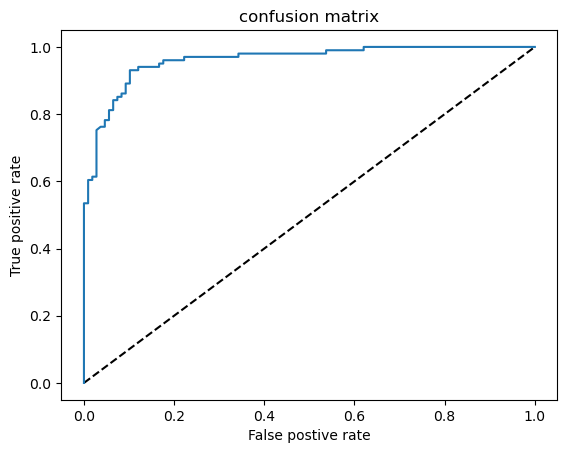

In [119]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="ExtraTreeClassifier")
plt.xlabel("False postive rate")
plt.ylabel("True positive rate")
plt.title("confusion matrix")
plt.show()

In [120]:
auc_score=roc_auc_score(y_test,ET_model.predict(x_test))

In [121]:
print(auc_score)

0.8946186285295196


In [ ]:
#Checking AUC ROC for BC model

In [122]:
y_pred_prob1 = BC_model.predict_proba(x_test)[:, 1]
y_pred_prob1

array([1.        , 1.        , 0.7       , 1.        , 0.        ,
       0.7       , 0.        , 0.        , 0.9       , 0.7       ,
       0.4       , 0.8       , 0.3       , 1.        , 0.2       ,
       0.6       , 0.7       , 0.3       , 0.6       , 0.2       ,
       1.        , 0.3       , 0.        , 0.6       , 0.        ,
       0.1       , 0.4       , 0.8       , 0.3       , 0.1       ,
       0.8       , 0.2       , 0.3       , 0.8       , 0.4       ,
       1.        , 0.        , 0.9       , 0.9       , 0.        ,
       0.8       , 0.3       , 0.6       , 1.        , 0.1       ,
       0.2       , 0.        , 0.3       , 1.        , 0.        ,
       0.8       , 0.7       , 0.5       , 0.8       , 0.2       ,
       0.        , 0.        , 0.3       , 0.6       , 0.7       ,
       0.1       , 0.        , 0.7       , 0.6       , 0.1       ,
       0.3       , 1.        , 0.        , 0.2       , 0.        ,
       1.        , 0.5       , 0.        , 0.8       , 0.     

In [123]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob1)

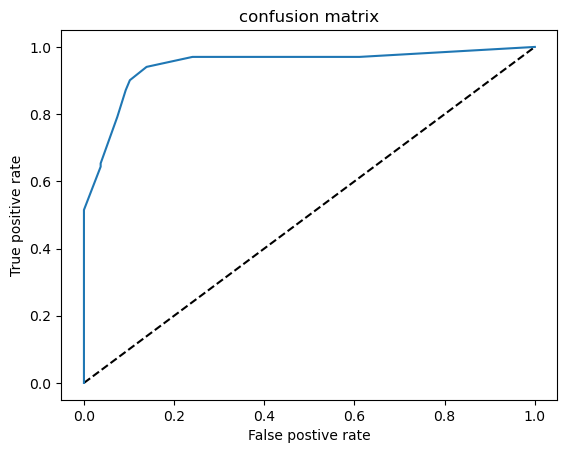

In [124]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Bagging Classigier")
plt.xlabel("False postive rate")
plt.ylabel("True positive rate")
plt.title("confusion matrix")
plt.show()

In [125]:
auc_score=roc_auc_score(y_test,BC_model.predict(x_test))

In [126]:
print(auc_score)

0.8893472680601393


# Saving the model

In [127]:
#Saving ET model using pickle
import pickle
filename="Titanic_survival.pkl"
pickle.dump(ET_model,open(filename,"wb")) 

In [130]:
load_model=pickle.load(open("Titanic_survival.pkl","rb"))
result=load_model.score(x_test,y_test)
print(result*100)

89.47368421052632


In [131]:
conclusion =pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
Predicted,1,1,1,1,0,1,0,0,1,1,...,0,1,1,0,0,1,0,1,0,1
Original,1,1,1,1,0,1,0,0,1,1,...,0,1,1,0,0,1,0,1,0,1


In [132]:
#Saving BC model using pickle

filename1="Titanic_survival1.pkl"
pickle.dump(BC_model,open(filename1,"wb")) 

In [134]:
load_model1=pickle.load(open("Titanic_survival1.pkl","rb"))
result1=load_model1.score(x_test,y_test)
print(result1*100)

88.99521531100478


In [135]:
conclusion1 =pd.DataFrame([load_model1.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion1

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
Predicted,1,1,1,1,0,1,0,0,1,1,...,0,1,1,0,0,1,0,1,0,1
Original,1,1,1,1,0,1,0,0,1,1,...,0,1,1,0,0,1,0,1,0,1
